# STOCK MARKET PRICE PREDICTION USING LSTM

In [1]:
import sys
print (sys.version)
print(sys.executable)

3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
c:\users\hp\anaconda3\envs\memoire\python.exe


## 1. AMAZON

### Importing Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

from sklearn import linear_model
from keras.layers import LSTM,Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

### Reading of Data From the directory

#### As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [3]:
AMAZON = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/AMAZON.csv', na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
AMAZON.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,181.580002,183.250000,178.589996,180.130005,180.130005,5684100
2011-04-04,180.889999,183.610001,180.690002,182.940002,182.940002,4186400
2011-04-05,182.100006,186.360001,181.800003,185.289993,185.289993,5569200
2011-04-06,186.149994,188.270004,181.119995,182.759995,182.759995,5430700
2011-04-07,182.779999,185.169998,181.759995,184.910004,184.910004,4564000


In [4]:
AMAZON.shape

(2516, 6)

In [5]:
AMAZON.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,1004.707739,1015.297173,992.645958,1004.349713,1004.349713,4.252377e+06
std,883.723764,893.853058,871.757134,882.810839,882.810839,2.347787e+06
min,169.619995,174.550003,166.970001,173.100006,173.100006,8.813000e+05
25%,299.955002,303.589996,296.267509,299.697495,299.697495,2.752825e+06
50%,665.575012,674.390015,659.290009,664.649994,664.649994,3.649200e+06
75%,1680.000000,1699.925018,1661.027496,1675.072540,1675.072540,4.962775e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.413420e+07


In [6]:
AMAZON.isnull().values.any()

False

<AxesSubplot:title={'center':'AMAZON STOCK PRICES'}, xlabel='Date'>

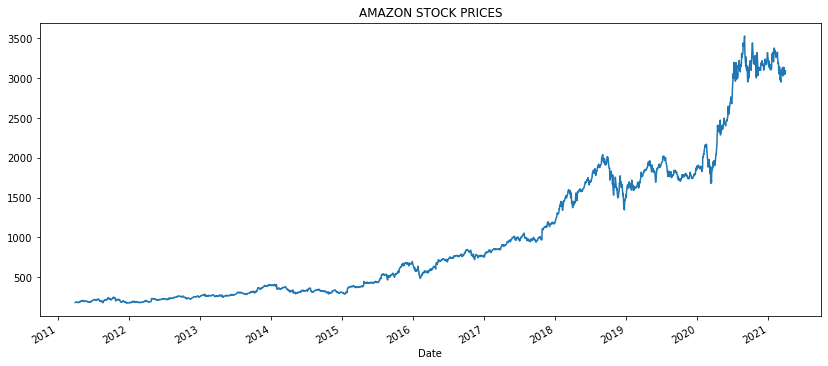

In [7]:
AMAZON['Close'].plot(figsize=(14,6), title = 'AMAZON STOCK PRICES')

### Correlation Analysis

<AxesSubplot:title={'center':'Correlation with Close'}>

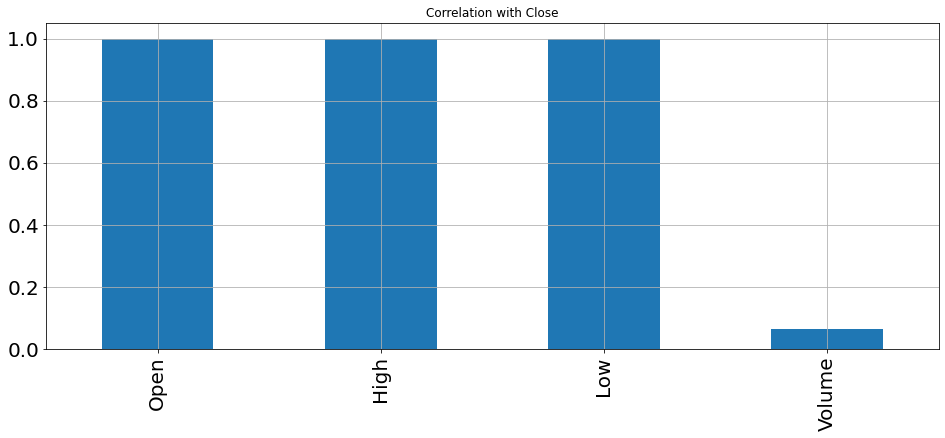

In [8]:
#Correlation Analysis
X=AMAZON.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(AMAZON['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [12]:
test = AMAZON
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,181.580002,183.250000,178.589996,180.130005,180.130005,5684100
2011-04-04,180.889999,183.610001,180.690002,182.940002,182.940002,4186400
2011-04-05,182.100006,186.360001,181.800003,185.289993,185.289993,5569200
2011-04-06,186.149994,188.270004,181.119995,182.759995,182.759995,5430700
2011-04-07,182.779999,185.169998,181.759995,184.910004,184.910004,4564000


In [13]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

### Normalizing Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.003541,0.002576,0.003500,0.206546
2011-04-04,0.003337,0.002682,0.004133,0.142137
2011-04-05,0.003695,0.003496,0.004467,0.201605
2011-04-06,0.004894,0.004062,0.004262,0.195649
2011-04-07,0.003897,0.003144,0.004455,0.158376


In [15]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-180:-1]
target_adj_close = target_adj_close[:-180]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-180:-1]
feature_minmax_transform = feature_minmax_transform[:-180]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.003541,0.002576,0.003500,0.206546
2011-04-04,0.003337,0.002682,0.004133,0.142137
2011-04-05,0.003695,0.003496,0.004467,0.201605
2011-04-06,0.004894,0.004062,0.004262,0.195649
2011-04-07,0.003897,0.003144,0.004455,0.158376


Shape of features :  (2516, 4)
Shape of target :  (2516, 1)


,Open,High,Low,Volume
Date,,,,
2021-03-24,0.882761,0.883962,0.879044,0.089352
2021-03-25,0.859652,0.869003,0.864582,0.115349
2021-03-26,0.851086,0.853276,0.852189,0.104305
2021-03-29,0.854455,0.863517,0.861964,0.080192
2021-03-30,0.858769,0.858114,0.863636,0.062629


,Close
Date,
2021-03-24,3046.260010
2021-03-25,3052.030029
2021-03-26,3075.729980
2021-03-29,3055.290039
2021-03-30,3094.080078



 -----After process------ 

Shape of features :  (2336, 4)
Shape of target :  (2336, 1)


,Close
Date,
2020-07-08,3182.629883
2020-07-09,3200.000000
2020-07-10,3104.000000
2020-07-13,3084.000000
2020-07-14,3008.870117


### Train Test Split Using Time Series

In [16]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [19]:
X_train.shape

(2124, 4)

In [21]:
y_train.shape

(2124,)

In [22]:
X_test.shape

(212, 4)

In [23]:
y_test.shape

(212,)

In [314]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

## LSTM MODEL

In [17]:
#Processing the data for LSTM
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [316]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
295/295 [==============================] - 4s 1ms/step - loss: 147087.9092
Epoch 2/200
295/295 [==============================] - 0s 1ms/step - loss: 145422.7688
Epoch 3/200
295/295 [==============================] - 0s 1ms/step - loss: 143312.9914
Epoch 4/200
295/295 [==============================] - 0s 2ms/step - loss: 140340.8773
Epoch 5/200
295/295 [==============================] - 0s 1ms/step - loss: 136547.1348
Epoch 6/200
295/295 [==============================] - 0s 1ms/step - loss: 132060.4512
Epoch 7/200
295/295 [==============================] - 0s 1ms/step - loss: 127033.5112
Epoch 8/200
295/295 [==============================] - 0s 1ms/step - loss: 121611.2276
Epoch 9/200
295/295 [==============================] - 0s 1ms/step - loss: 115920.0356
Epoch 10/200
295/295 [==============================] - 0s 1ms/step - loss: 110067.4024
Epoch 11/200
295/295 [==============================] - 0s 1ms/step - loss: 104145.0493
Epoch 12/200
295/295 [===================

### Prediction by LSTM

In [317]:
#Evaluation of model
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.999
The R2 score on the Test set is:	0.956


In [318]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

235/235 [==============================] - 3s 765us/step - loss: 5610.7300


In [319]:
print('LSTM: %f'%score_lstm)

LSTM: 5610.729980


In [320]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

### Prediction Visualization

In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

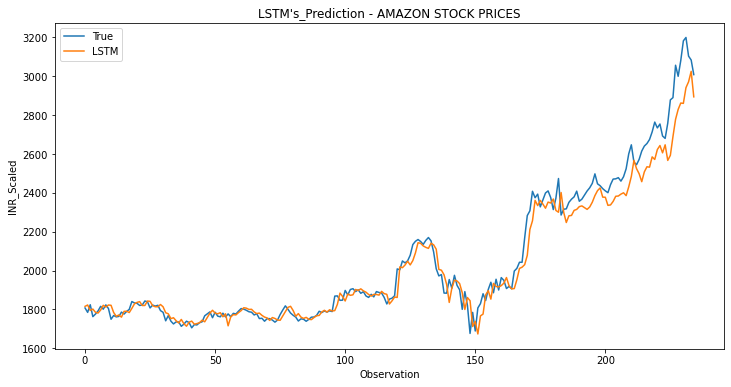

In [322]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - AMAZON STOCK PRICES")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [323]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,"1,807.58","1,816.01","709,826.19"
1,"1,784.92","1,822.98","704,213.56"
2,"1,824.34","1,794.89","696,487.25"
3,"1,762.96","1,802.09","686,293.12"
4,"1,776.12","1,785.55","673,932.12"


In [324]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 48.74962753706782
Mean Squared Error: 5610.731840834851
Root Mean Squared Error: 74.90481854216624


## 2. APPLE

In [40]:
APPLE = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/APPLE.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
APPLE.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,12.539643,12.556786,12.260714,12.305714,10.599690,418661600
2011-04-04,12.296786,12.307143,12.085714,12.185357,10.496021,460084800
2011-04-05,12.035357,12.223214,12.000000,12.103214,10.425268,482731200
2011-04-06,12.186429,12.282143,12.040714,12.072857,10.399117,402539200
2011-04-07,12.075000,12.158214,12.001071,12.074286,10.400350,373447200


In [41]:
APPLE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,39.043929,39.453320,38.624479,39.052391,37.344642,2.455861e+08
std,27.996485,28.370660,27.573493,27.984774,28.578943,1.931286e+08
min,11.310000,11.346429,11.089286,11.261429,9.700181,4.544800e+07
25%,20.516430,20.646428,20.336160,20.437232,17.848626,1.118972e+08
50%,29.003750,29.210000,28.737500,28.955000,26.840699,1.765016e+08
75%,46.466876,46.836875,46.152500,46.476875,45.146199,3.179722e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,1.506120e+09


In [42]:
APPLE.isnull().values.any()

False

<AxesSubplot:title={'center':'APPLE STOCK PRICES'}, xlabel='Date'>

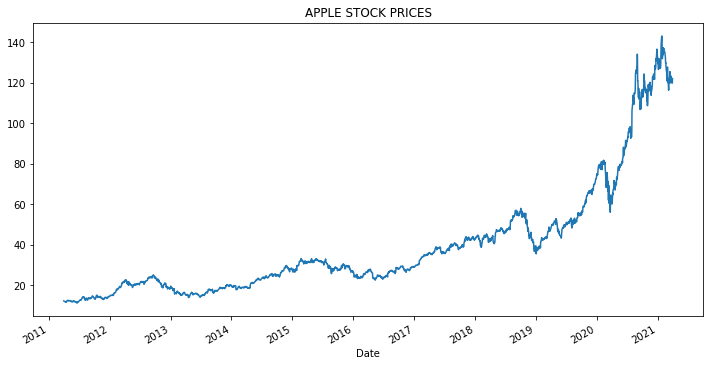

In [43]:
APPLE['Close'].plot(figsize=(12,6), title = 'APPLE STOCK PRICES')

<AxesSubplot:title={'center':'Correlation with Close'}>

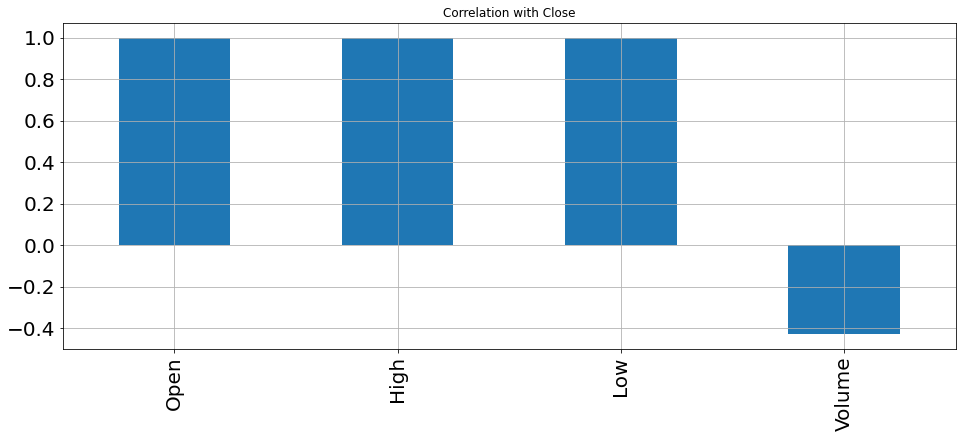

In [44]:
X=APPLE.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(APPLE['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [45]:
test = APPLE
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,12.539643,12.556786,12.260714,12.305714,10.599690,418661600
2011-04-04,12.296786,12.307143,12.085714,12.185357,10.496021,460084800
2011-04-05,12.035357,12.223214,12.000000,12.103214,10.425268,482731200
2011-04-06,12.186429,12.282143,12.040714,12.072857,10.399117,402539200
2011-04-07,12.075000,12.158214,12.001071,12.074286,10.400350,373447200


In [60]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.009295,0.009050,0.008992,0.255508
2011-04-04,0.007459,0.007183,0.007648,0.283867
2011-04-05,0.005483,0.006556,0.006990,0.299371
2011-04-06,0.006625,0.006996,0.007303,0.244470
2011-04-07,0.005783,0.006070,0.006999,0.224554


In [48]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-180:-1]
target_adj_close = target_adj_close[:-180]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-120:-1]
feature_minmax_transform = feature_minmax_transform[:-180]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.009295,0.009050,0.008992,0.255508
2011-04-04,0.007459,0.007183,0.007648,0.283867
2011-04-05,0.005483,0.006556,0.006990,0.299371
2011-04-06,0.006625,0.006996,0.007303,0.244470
2011-04-07,0.005783,0.006070,0.006999,0.224554


Shape of features :  (2516, 4)
Shape of target :  (2516, 1)


,Open,High,Low,Volume
Date,,,,
2021-03-24,0.842921,0.834086,0.836507,0.029495
2021-03-25,0.818127,0.824814,0.828294,0.036556
2021-03-26,0.824250,0.823468,0.827680,0.033211
2021-03-29,0.834077,0.831693,0.841573,0.024216
2021-03-30,0.822436,0.815393,0.827219,0.027538


,Close
Date,
2021-03-24,120.589996
2021-03-25,121.209999
2021-03-26,121.389999
2021-03-29,119.900002
2021-03-30,122.150002



 -----After process------ 

Shape of features :  (2336, 4)
Shape of target :  (2336, 1)


,Close
Date,
2020-07-08,95.752502
2020-07-09,95.919998
2020-07-10,95.477501
2020-07-13,97.057503
2020-07-14,97.724998


In [63]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [64]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [65]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
295/295 [==============================] - 4s 2ms/step - loss: 355.0206
Epoch 2/200
295/295 [==============================] - 1s 2ms/step - loss: 280.2166
Epoch 3/200
295/295 [==============================] - 0s 1ms/step - loss: 154.9196
Epoch 4/200
295/295 [==============================] - 0s 1ms/step - loss: 59.2963
Epoch 5/200
295/295 [==============================] - 0s 1ms/step - loss: 42.8464
Epoch 6/200
295/295 [==============================] - 0s 1ms/step - loss: 61.8390
Epoch 7/200
295/295 [==============================] - 0s 1ms/step - loss: 74.9503
Epoch 8/200
295/295 [==============================] - 0s 1ms/step - loss: 70.5571
Epoch 9/200
295/295 [==============================] - 0s 1ms/step - loss: 57.1021
Epoch 10/200
295/295 [==============================] - 0s 1ms/step - loss: 40.9648
Epoch 11/200
295/295 [==============================] - 0s 1ms/step - loss: 26.4175
Epoch 12/200
295/295 [==============================] - 0s 1ms/step - loss: 15.341

In [52]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.998
The R2 score on the Test set is:	0.830


In [67]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

235/235 [==============================] - 3s 838us/step - loss: 25.8273


In [69]:
print('LSTM: %f'%score_lstm)

LSTM: 5.827295


In [70]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

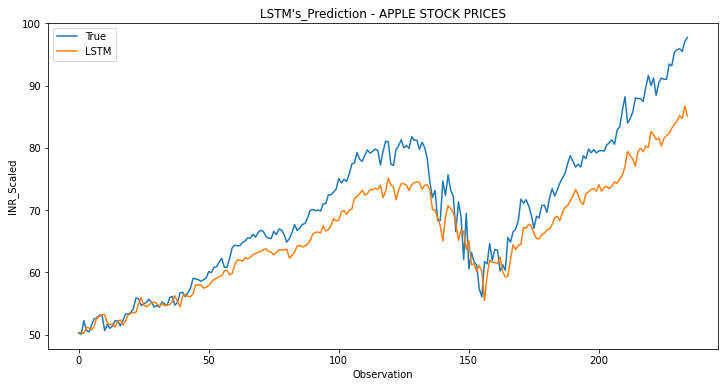

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - APPLE STOCK PRICES")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [383]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,43.12,43.88,755.70
1,43.23,43.69,616.34
2,44.72,43.39,389.31
3,45.23,42.79,192.61
4,45.43,44.20,95.09


In [384]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 1.7893405207563127
Mean Squared Error: 5.830101872065758
Root Mean Squared Error: 2.4145603889871463


#### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors. The MSE is a measure of the quality of an estimator. it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
#### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion of the real close price.

## 3. GOOGLE

In [73]:
GOOGLE = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/GOOGLE.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
GOOGLE.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,293.280701,296.483704,293.280701,294.795044,294.795044,5245990
2011-04-04,295.392792,296.259552,290.461273,292.742737,292.742737,4124402
2011-04-05,289.455048,289.659271,281.783813,283.482452,283.482452,12140335
2011-04-06,285.021667,286.506104,282.939484,286.017944,286.017944,5356603
2011-04-07,286.790039,289.235870,286.022919,288.917053,288.917053,5081977


<AxesSubplot:title={'center':'GOOGLE STOCK PRICES'}, xlabel='Date'>

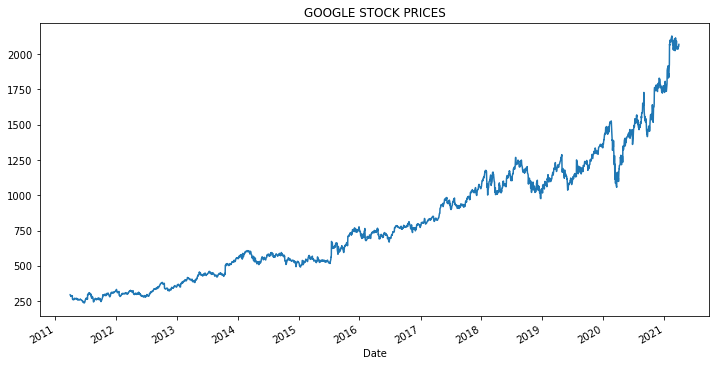

In [74]:
GOOGLE['Close'].plot(figsize=(12,6), title = 'GOOGLE STOCK PRICES')

<AxesSubplot:title={'center':'Correlation with Close'}>

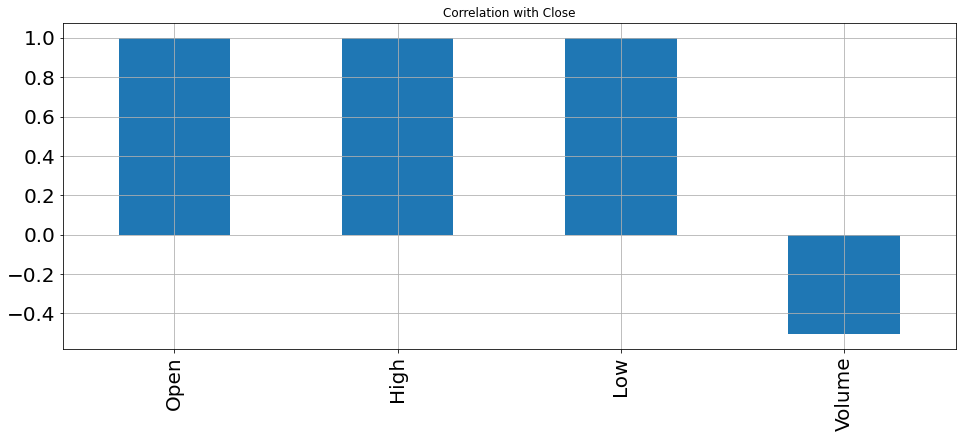

In [75]:
X=GOOGLE.drop(['Close'],axis=1)
X=X.drop(['Adj Close'],axis=1)

X.corrwith(GOOGLE['Close']).plot.bar(
        figsize = (16, 6), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)

In [76]:
test = GOOGLE
# Target column
target_adj_close = pd.DataFrame(test['Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-04-01,293.280701,296.483704,293.280701,294.795044,294.795044,5245990
2011-04-04,295.392792,296.259552,290.461273,292.742737,292.742737,4124402
2011-04-05,289.455048,289.659271,281.783813,283.482452,283.482452,12140335
2011-04-06,285.021667,286.506104,282.939484,286.017944,286.017944,5356603
2011-04-07,286.790039,289.235870,286.022919,288.917053,288.917053,5081977


In [77]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.030356,0.029796,0.030852,0.185848
2011-04-04,0.031478,0.029679,0.029343,0.146053
2011-04-05,0.028325,0.026229,0.024700,0.430460
2011-04-06,0.025971,0.024581,0.025318,0.189772
2011-04-07,0.026910,0.026008,0.026968,0.180028


In [79]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-180:-1]
target_adj_close = target_adj_close[:-180]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-120:-1]
feature_minmax_transform = feature_minmax_transform[:-180]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2011-04-01,0.030356,0.029796,0.030852,0.185848
2011-04-04,0.031478,0.029679,0.029343,0.146053
2011-04-05,0.028325,0.026229,0.024700,0.430460
2011-04-06,0.025971,0.024581,0.025318,0.189772
2011-04-07,0.026910,0.026008,0.026968,0.180028


Shape of features :  (2516, 4)
Shape of target :  (2516, 1)


,Open,High,Low,Volume
Date,,,,
2021-03-24,0.971378,0.961076,0.966392,0.040663
2021-03-25,0.960460,0.950967,0.949896,0.050062
2021-03-26,0.957300,0.946848,0.951657,0.052709
2021-03-29,0.951470,0.950737,0.952513,0.043352
2021-03-30,0.967268,0.957192,0.967716,0.036498


,Close
Date,
2021-03-24,2044.359985
2021-03-25,2035.550049
2021-03-26,2055.949951
2021-03-29,2055.540039
2021-03-30,2068.629883



 -----After process------ 

Shape of features :  (2336, 4)
Shape of target :  (2336, 1)


,Close
Date,
2020-07-08,1510.989990
2020-07-09,1541.739990
2020-07-10,1511.339966
2020-07-13,1520.579956
2020-07-14,1513.640015


In [80]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [81]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [82]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [83]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
266/266 [==============================] - 8s 2ms/step - loss: 232276.5810
Epoch 2/200
266/266 [==============================] - 0s 1ms/step - loss: 229195.2508
Epoch 3/200
266/266 [==============================] - 0s 1ms/step - loss: 222895.2715
Epoch 4/200
266/266 [==============================] - 0s 1ms/step - loss: 213049.7686
Epoch 5/200
266/266 [==============================] - 0s 1ms/step - loss: 200444.3838
Epoch 6/200
266/266 [==============================] - 0s 1ms/step - loss: 185975.6820
Epoch 7/200
266/266 [==============================] - 0s 1ms/step - loss: 170372.1987
Epoch 8/200
266/266 [==============================] - 0s 1ms/step - loss: 154197.2129
Epoch 9/200
266/266 [==============================] - 0s 1ms/step - loss: 137897.8488
Epoch 10/200
266/266 [==============================] - 0s 1ms/step - loss: 121841.7513
Epoch 11/200
266/266 [==============================] - 0s 1ms/step - loss: 106338.3521
Epoch 12/200
266/266 [===================

In [84]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.998
The R2 score on the Test set is:	0.920


In [85]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

212/212 [==============================] - 3s 881us/step - loss: 988.9382


In [86]:
print('LSTM: %f'%score_lstm)

LSTM: 988.938171


In [87]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

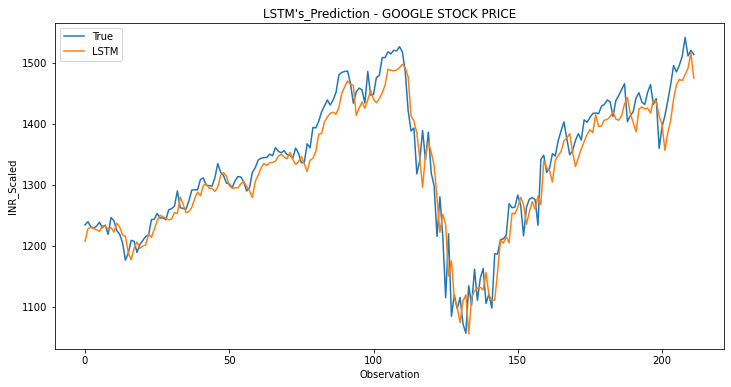

In [89]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction - GOOGLE STOCK PRICE")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [401]:
col1 = pd.DataFrame(y_test, columns=['Actual Value'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.head(5)

,Actual Value,LSTM Prediction,Loss_LSTM
0,"1,188.01","1,186.75","485,174.47"
1,"1,174.71","1,194.70","480,089.12"
2,"1,197.27","1,177.47","471,039.69"
3,"1,164.29","1,182.62","458,412.00"
4,"1,167.26","1,173.23","441,030.66"


In [402]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_test_LSTM ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_LSTM )))

Mean Absolute Error: 22.13527312480053
Mean Squared Error: 883.420178773488
Root Mean Squared Error: 29.72238514610643
